In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
path = r"C:\Users\khush\OneDrive\Documents\Insider-trading\insider-trading-signal\ETL\final_data_2025Q1.parquet"

df = pd.read_parquet(path, engine="fastparquet")
df.head(20)

,side,log_dollar_value,role,is_10b5_1,log_size_vs_cap,label_up_market
3,sell,15.441086,OFFICER,0,-9.087956,1
4,sell,14.496378,DIRECTOR,0,-10.032665,1
5,buy,13.401964,OFFICER,0,-9.559271,1
6,sell,14.673079,OFFICER,1,-10.128313,0
7,sell,11.586464,DIRECTOR,1,-13.214937,0
8,sell,15.554449,OFFICER,1,-9.246943,0
9,sell,13.269491,OFFICER,0,-10.009910,0
10,sell,15.226362,OFFICER,0,-8.053038,0
11,sell,13.603320,DIRECTOR,0,-9.676081,0
19,sell,11.336200,OFFICER,0,-11.597717,1


In [3]:
df_encoded = pd.get_dummies(df, columns=['side', 'role'], drop_first=True)

In [4]:
target_col = 'label_up_market'
X = df_encoded.drop(columns=[target_col])
y = df_encoded[target_col]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4) 
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [7]:
y_pred = clf.predict(X_test)

In [8]:
print("--- Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

--- Model Performance ---
Accuracy: 0.5996

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.88      0.72      1058
           1       0.51      0.19      0.28       720

    accuracy                           0.60      1778
   macro avg       0.56      0.53      0.50      1778
weighted avg       0.57      0.60      0.54      1778



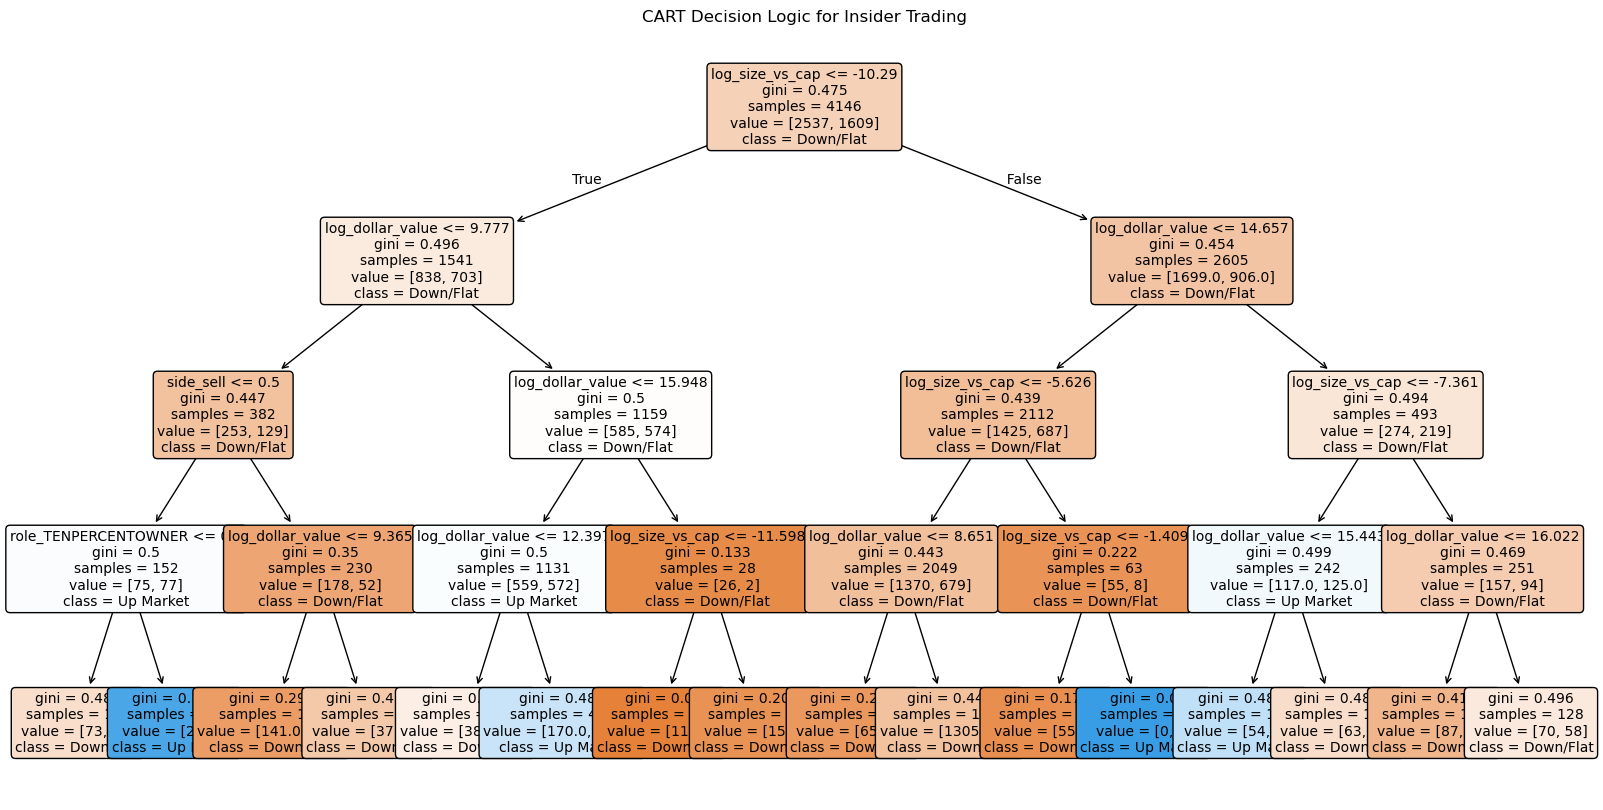

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=X.columns, 
          class_names=['Down/Flat', 'Up Market'],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("CART Decision Logic for Insider Trading")
plt.show()

In [10]:
importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n--- Feature Importance ---")
print(importance)


--- Feature Importance ---
log_dollar_value        0.484915
log_size_vs_cap         0.306424
side_sell               0.122006
role_TENPERCENTOWNER    0.086656
is_10b5_1               0.000000
role_OFFICER            0.000000
role_OTHER              0.000000
dtype: float64


In [11]:
default_accuracy = y.value_counts().max() / len(y)
print("Default (baseline) accuracy:", default_accuracy)

Default (baseline) accuracy: 0.6068534773801485
